In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
temp1=pd.read_csv('temp1.csv')

In [5]:
temp1.isnull().sum()

patient_nbr                 0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
diagnosis                   0
dtype: int64

In [6]:
temp2=pd.read_csv('temp2.csv')

In [7]:
temp2.isnull().sum()

patient_nbr                 0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
circulatory                 0
respiratory                 0
digestive                   0
diabetic                    0
injury                      0
musculusketal               0
genitourinary               0
neoplasms                   0
dtype: int64

In [8]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77272 entries, 0 to 77271
Data columns (total 21 columns):
patient_nbr                 77272 non-null int64
number_diagnoses            77272 non-null int64
admission_type_id           77272 non-null object
discharge_disposition_id    77272 non-null object
admission_source_id         77272 non-null object
time_in_hospital            77272 non-null int64
encounter_id                77272 non-null int64
race                        77272 non-null object
gender                      77272 non-null object
age                         77272 non-null object
num_lab_procedures          77272 non-null int64
num_procedures              77272 non-null int64
num_medications             77272 non-null int64
number_outpatient           77272 non-null int64
number_emergency            77272 non-null int64
number_inpatient            77272 non-null int64
change                      77272 non-null object
readmitted                  77272 non-null object
T

### dropping num_procedures(did not pass p value test) , patient_nbr and encounter_id

In [10]:
temp1.drop(['num_procedures','patient_nbr','encounter_id'],axis=1,inplace=True)
temp2.drop(['num_procedures','patient_nbr','encounter_id'],axis=1,inplace=True)

In [13]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77272 entries, 0 to 77271
Data columns (total 18 columns):
number_diagnoses            77272 non-null int64
admission_type_id           77272 non-null object
discharge_disposition_id    77272 non-null object
admission_source_id         77272 non-null object
time_in_hospital            77272 non-null int64
race                        77272 non-null object
gender                      77272 non-null object
age                         77272 non-null object
num_lab_procedures          77272 non-null int64
num_medications             77272 non-null int64
number_outpatient           77272 non-null int64
number_emergency            77272 non-null int64
number_inpatient            77272 non-null int64
change                      77272 non-null object
readmitted                  77272 non-null object
Total_drugs                 77272 non-null int64
Solo_Insulin                77272 non-null int64
diagnosis                   77272 non-null int64
d

### TEMP1

In [16]:
# naives bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
temp1.columns

Index(['number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'change', 'readmitted',
       'Total_drugs', 'Solo_Insulin', 'diagnosis'],
      dtype='object')

In [49]:
temp1.shape

(77272, 18)

In [170]:
x=temp1.drop('Solo_Insulin',axis=1)
y=temp1['Solo_Insulin']

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [172]:
num_train=x_train[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]
num_test=num=x_test[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]

In [173]:
sc=StandardScaler()
num_train=pd.DataFrame(sc.fit_transform(num_train),columns=num_train.columns)
num_test=pd.DataFrame(sc.transform(num_test),columns=num_test.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
x_train.index=np.arange(len(x_train))
x_test.index=np.arange(len(x_test))

In [175]:
x_test.shape

(15455, 17)

In [176]:
x_train.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)
x_test.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [177]:
x_train=pd.concat([x_train,num_train],axis=1)
x_test=pd.concat([x_test,num_test],axis=1)

In [178]:
x_test.isnull().sum()

admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
race                        0
gender                      0
age                         0
change                      0
readmitted                  0
diagnosis                   0
number_diagnoses            0
time_in_hospital            0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
Total_drugs                 0
dtype: int64

In [179]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [180]:
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [181]:
x_train.shape


(61817, 46)

In [182]:
x_test.shape

(15455, 46)

In [183]:
y_train.shape

(61817,)

In [184]:
y_test.shape

(15455,)

### Naive Bayes

In [43]:
import sklearn.metrics as metrics

In [185]:
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print('Accuracy is {}'.format(metrics.accuracy_score(y_test, y_predict)))
print('AUC is {}'.format(aucmetric))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y_test,y_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y_test,y_predict)))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78      9414
           1       0.74      0.32      0.45      6041

   micro avg       0.69      0.69      0.69     15455
   macro avg       0.71      0.62      0.62     15455
weighted avg       0.70      0.69      0.65     15455

Accuracy is 0.6904561630540278
AUC is 0.6247978238920947
Kappa score is 0.2774375504980586
F1-Score is 0.44998850310416194


### DT

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
from sklearn.model_selection import GridSearchCV

In [52]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9)
grid = {'max_leaf_nodes':np.arange(10,21),'min_samples_leaf':np.arange(1,6)}
gridmodel=GridSearchCV(dt,grid,cv=3)
gridmodel.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), 'min_samples_leaf': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
gridmodel.best_params_

{'max_leaf_nodes': 17, 'min_samples_leaf': 1}

In [188]:
model = DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print('Accuracy is {}'.format(metrics.accuracy_score(y_test, y_predict)))
print('AUC is {}'.format(aucmetric))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y_test,y_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y_test,y_predict)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      9414
           1       0.76      0.79      0.77      6041

   micro avg       0.82      0.82      0.82     15455
   macro avg       0.81      0.81      0.81     15455
weighted avg       0.82      0.82      0.82     15455

Accuracy is 0.8200582335813652
AUC is 0.8139797197726871
Kappa score is 0.6243121409224464
F1-Score is 0.7735157586122648


### KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3,n_jobs=-1) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

In [69]:
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors=i)
    ypred=model.fit(x_train,y_train).predict(x_test)
    acc.append(metrics.accuracy_score(y_test,ypred))
    f1.append(metrics.f1_score(y_test,ypred))
    kappa.append(metrics.cohen_kappa_score(y_test,ypred))
    fpr,tpr,_=metrics.roc_curve(y_test,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))

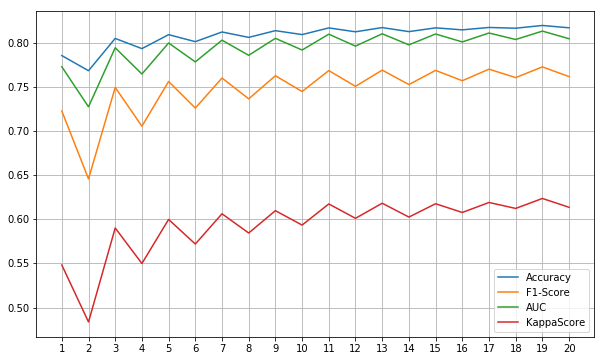

In [74]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,21),acc,label='Accuracy')
plt.plot(np.arange(1,21),f1,label='F1-Score')
plt.plot(np.arange(1,21),aucmetric,label='AUC')
plt.plot(np.arange(1,21),kappa,label='KappaScore')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [189]:
knn=KNeighborsClassifier(n_neighbors=11)
y_predict = knn.fit(x_train,y_train).predict(x_test)
print('Accuracy is {}'.format(metrics.accuracy_score(y_test, y_predict)))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y_test,y_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y_test,y_predict)))
fpr,tpr,_=metrics.roc_curve(y_test,y_predict)
print('AUC is {}'.format(aucmetric))

Accuracy is 0.8170818505338078
Kappa score is 0.6174437791765512
F1-Score is 0.7686768676867688
AUC is 0.8139797197726871


### Log Reg

In [190]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y_predict = lr.fit(x_train,y_train).predict(x_test)
print('Accuracy is {}'.format(metrics.accuracy_score(y_test, y_predict)))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y_test,y_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y_test,y_predict)))
fpr,tpr,_=metrics.roc_curve(y_test,y_predict)
print('AUC is {}'.format(aucmetric))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is 0.8297638304755742
Kappa score is 0.6454121281557941
F1-Score is 0.7871186989238612
AUC is 0.8139797197726871


In [193]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9414
           1       0.77      0.81      0.79      6041

   micro avg       0.83      0.83      0.83     15455
   macro avg       0.82      0.83      0.82     15455
weighted avg       0.83      0.83      0.83     15455

[[7960 1454]
 [1177 4864]]


In [249]:
lr.coef_

array([[ 3.87329291e-01,  2.69021075e-01, -2.94799507e-02,
         8.44798304e-02,  1.12701244e-01, -5.51692649e-02,
        -3.01319168e-03,  1.43446872e-01, -8.73994595e+00,
        -1.03474069e+00, -4.77501193e-01,  0.00000000e+00,
        -4.03824894e-01,  3.96368723e-01, -5.43828456e-01,
        -3.91693398e-02, -1.22667409e+00, -2.77445659e-01,
         0.00000000e+00, -2.14433099e-01,  0.00000000e+00,
        -3.33506577e-01,  0.00000000e+00,  2.80601393e-01,
         3.12805553e-01, -5.54897538e-02, -3.21034121e-02,
         0.00000000e+00, -3.36231784e-02, -8.05149649e-01,
        -8.39951953e-01,  4.19116512e+00,  2.32898866e+00,
         1.04853300e+00,  0.00000000e+00, -4.36505647e-01,
        -6.71964347e-01, -8.23442260e-01, -1.03860680e+00,
        -1.14100421e+00, -1.12328564e+00, -4.08127071e-02,
        -2.30430434e+00, -2.98026995e-02, -1.04086543e-01,
         0.00000000e+00]])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [195]:
xcopy=temp1.drop('Solo_Insulin',axis=1)
ycopy=temp1['Solo_Insulin']
num=xcopy[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]
sc=StandardScaler()
num=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
xcopy.index=np.arange(len(xcopy))
xcopy.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)
xcopy=pd.concat([xcopy,num],axis=1)
xcopy = pd.get_dummies(xcopy)
ycopy.index=np.arange(len(ycopy))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
from sklearn.model_selection import KFold

### NB KFOLD

In [196]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(xcopy,ycopy):
    xtrain,xtest=xcopy.iloc[train,:],xcopy.iloc[test,:]
    ytrain,ytest=ycopy.iloc[train],ycopy.iloc[test]
    nb=GaussianNB()
    ypred=nb.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred))
    f1.append(metrics.f1_score(ytest,ypred))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold NB Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold NB Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold NB Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold NB Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold NB Model is 0.704
Avg F1-score of KFold NB Model is 0.563
Avg Cohens Kappa Score of KFold NB Model is 0.348
Avg AUC of KFold NB Model is 0.666


### DT KFOLD

In [197]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(xcopy,ycopy):
    xtrain,xtest=xcopy.iloc[train,:],xcopy.iloc[test,:]
    ytrain,ytest=ycopy.iloc[train],ycopy.iloc[test]
    dt=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
    ypred=dt.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred))
    f1.append(metrics.f1_score(ytest,ypred))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold DT Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold DT Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold DT Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold DT Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold DT Model is 0.818
Avg F1-score of KFold DT Model is 0.774
Avg Cohens Kappa Score of KFold DT Model is 0.621
Avg AUC of KFold DT Model is 0.814


### KNN KFOLD

In [198]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(xcopy,ycopy):
    xtrain,xtest=xcopy.iloc[train,:],xcopy.iloc[test,:]
    ytrain,ytest=ycopy.iloc[train],ycopy.iloc[test]
    knn=KNeighborsClassifier(n_neighbors=11)
    ypred=knn.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred))
    f1.append(metrics.f1_score(ytest,ypred))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold KNN Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold KNN Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold KNN Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold KNN Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold KNN Model is 0.814
Avg F1-score of KFold KNN Model is 0.766
Avg Cohens Kappa Score of KFold KNN Model is 0.612
Avg AUC of KFold KNN Model is 0.808


### LOGISTIC REGRESSION KFOLD

In [199]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(xcopy,ycopy):
    xtrain,xtest=xcopy.iloc[train,:],xcopy.iloc[test,:]
    ytrain,ytest=ycopy.iloc[train],ycopy.iloc[test]
    lr=LogisticRegression()
    ypred=lr.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred))
    f1.append(metrics.f1_score(ytest,ypred))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold LR Model is 0.828
Avg F1-score of KFold LR Model is 0.785
Avg Cohens Kappa Score of KFold LR Model is 0.641
Avg AUC of KFold LR Model is 0.823


In [105]:
pd.DataFrame([['NB',34.8,56.3,66.6,70.4],['DT',62.1,77.4,81.4,81.8],['KNN',61.2,76.6,80.8,81.4],['LogReg',64.1,78.5,82.3,82.8]],columns=['Model','Kappa Score','F1-Score','AUC','Accuracy'])

,Model,Kappa Score,F1-Score,AUC,Accuracy
0,NB,34.8,56.3,66.6,70.4
1,DT,62.1,77.4,81.4,81.8
2,KNN,61.2,76.6,80.8,81.4
3,LogReg,64.1,78.5,82.3,82.8


In [130]:
temp1.isnull().sum()

number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
diagnosis                   0
dtype: int64

### TEMP2

In [200]:
temp2=pd.read_csv('temp2(Hemu) (1).csv')

In [132]:
# naives bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [201]:
temp2.columns

Index(['number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'change', 'readmitted',
       'Total_drugs', 'Solo_Insulin', 'circulatory', 'respiratory',
       'digestive', 'injury', 'diabetes', 'musculusketal', 'genitourinary',
       'neoplasms', 'others'],
      dtype='object')

In [202]:
temp2.shape

(77272, 26)

In [203]:
temp2.isnull().sum()

number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
circulatory                 0
respiratory                 0
digestive                   0
injury                      0
diabetes                    0
musculusketal               0
genitourinary               0
neoplasms                   0
others                      0
dtype: int64

In [204]:
x1=temp2.drop('Solo_Insulin',axis=1)
y1=temp2['Solo_Insulin']

In [205]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1,stratify=y)

In [206]:
num_train=x1_train[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]
num_test=x1_test[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]

In [207]:
sc=StandardScaler()
num_train=pd.DataFrame(sc.fit_transform(num_train),columns=num_train.columns)
num_test=pd.DataFrame(sc.transform(num_test),columns=num_test.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
x1_train.index=np.arange(len(x1_train))
x1_test.index=np.arange(len(x1_test))

In [209]:
x1_test.shape

(15455, 25)

In [210]:
x1_train.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)
x1_test.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [211]:
x1_train=pd.concat([x1_train,num_train],axis=1)
x1_test=pd.concat([x1_test,num_test],axis=1)

In [212]:
x1_test.isnull().sum()

admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
race                        0
gender                      0
age                         0
change                      0
readmitted                  0
circulatory                 0
respiratory                 0
digestive                   0
injury                      0
diabetes                    0
musculusketal               0
genitourinary               0
neoplasms                   0
others                      0
number_diagnoses            0
time_in_hospital            0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
Total_drugs                 0
dtype: int64

In [213]:
x1_train = pd.get_dummies(x1_train)
x1_test = pd.get_dummies(x1_test)

In [214]:
y1_train.index=np.arange(len(y1_train))
y1_test.index=np.arange(len(y1_test))

In [215]:
x1_train.shape


(61817, 54)

In [216]:
x1_test.shape

(15455, 54)

In [217]:
y1_train.shape

(61817,)

In [218]:
y1_test.shape

(15455,)

### Naive Bayes

In [43]:
import sklearn.metrics as metrics

In [219]:
model = GaussianNB()
model.fit(x1_train, y1_train)
y1_predict = model.predict(x1_test)

print(metrics.classification_report(y1_test, y1_predict))
fpr,tpr,_ =metrics.roc_curve(y1_test, y1_predict)
aucmetric=metrics.auc(fpr,tpr)
print('Accuracy is {}'.format(metrics.accuracy_score(y1_test, y1_predict)))
print('AUC is {}'.format(aucmetric))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y1_test,y1_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y1_test,y1_predict)))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      9414
           1       0.74      0.39      0.51      6041

   micro avg       0.71      0.71      0.71     15455
   macro avg       0.72      0.65      0.65     15455
weighted avg       0.71      0.71      0.68     15455

Accuracy is 0.7063733419605306
AUC is 0.6490731998576261
Kappa score is 0.3259248178684444
F1-Score is 0.5071676802780191


### DT

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.model_selection import GridSearchCV

In [152]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9)
grid = {'max_leaf_nodes':np.arange(10,21),'min_samples_leaf':np.arange(1,6)}
gridmodel=GridSearchCV(dt,grid,cv=3)
gridmodel.fit(x1_train,y1_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), 'min_samples_leaf': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
gridmodel.best_params_

{'max_leaf_nodes': 20, 'min_samples_leaf': 1}

In [220]:
model = DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=20,min_samples_leaf=1)
model.fit(x1_train, y1_train)
y1_predict = model.predict(x1_test)

print(metrics.classification_report(y1_test, y1_predict))
fpr,tpr,_ =metrics.roc_curve(y1_test, y1_predict)
aucmetric=metrics.auc(fpr,tpr)
print('Accuracy is {}'.format(metrics.accuracy_score(y1_test, y1_predict)))
print('AUC is {}'.format(aucmetric))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y1_test,y1_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y1_test,y1_predict)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      9414
           1       0.76      0.80      0.78      6041

   micro avg       0.82      0.82      0.82     15455
   macro avg       0.81      0.82      0.82     15455
weighted avg       0.83      0.82      0.82     15455

Accuracy is 0.8236169524425753
AUC is 0.8186209123288856
Kappa score is 0.6324032536655426
F1-Score is 0.7790923824959481


### KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3,n_jobs=-1) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

In [155]:
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors=i)
    y1pred=model.fit(x1_train,y1_train).predict(x1_test)
    acc.append(metrics.accuracy_score(y1_test,y1pred))
    f1.append(metrics.f1_score(y1_test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1_test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1_test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))

ValueError: x and y must have same first dimension, but have shapes (20,) and (5,)

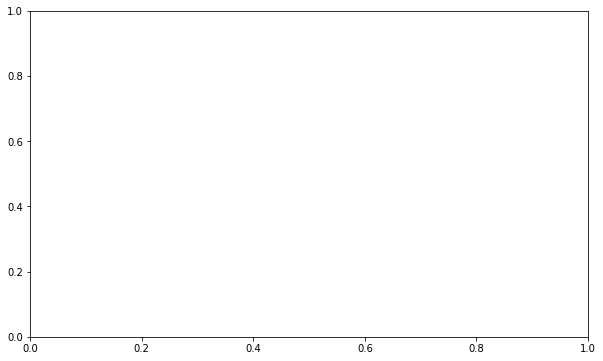

In [247]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,21),acc,label='Accuracy')
plt.plot(np.arange(1,21),f1,label='F1-Score')
plt.plot(np.arange(1,21),aucmetric,label='AUC')
plt.plot(np.arange(1,21),kappa,label='KappaScore')
plt.xlabel('K Value')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [221]:
knn=KNeighborsClassifier(n_neighbors=11)
y1_predict = knn.fit(x1_train,y1_train).predict(x1_test)
print('Accuracy is {}'.format(metrics.accuracy_score(y1_test, y1_predict)))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y1_test,y1_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y1_test,y1_predict)))
fpr,tpr,_=metrics.roc_curve(y1_test,y1_predict)
print('AUC is {}'.format(metrics.auc(fpr,tpr)))

Accuracy is 0.82012293756066
Kappa score is 0.6221859869322566
F1-Score is 0.7697913216296787
AUC is 0.8110376400031413


### Log Reg

In [250]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y1_predict = lr.fit(x1_train,y1_train).predict(x1_test)
print('Accuracy is {}'.format(metrics.accuracy_score(y1_test, y1_predict)))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(y1_test,y1_predict)))
print('F1-Score is {}'.format(metrics.f1_score(y1_test,y1_predict)))
fpr,tpr,_=metrics.roc_curve(y1_test,y1_predict)
print('AUC is {}'.format(metrics.auc(fpr,tpr)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is 0.837140084115173
Kappa score is 0.6601364686244907
F1-Score is 0.7952826352175681
AUC is 0.8321531411285681


In [223]:
print(metrics.classification_report(y_test,y1_predict))
print(metrics.confusion_matrix(y_test,y1_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      9414
           1       0.78      0.81      0.80      6041

   micro avg       0.84      0.84      0.84     15455
   macro avg       0.83      0.83      0.83     15455
weighted avg       0.84      0.84      0.84     15455

[[8049 1365]
 [1152 4889]]


In [224]:
lr.coef_

array([[-3.22857543e-02, -2.37605656e-02,  5.81208278e-01,
         7.25842835e-02,  4.66908917e-01, -5.15733354e-01,
         3.46292111e-01, -1.99885923e-02,  6.22765557e-02,
         2.57533433e-01, -7.16821549e-02,  5.18581029e-02,
         1.89644983e-01, -5.33414550e-02, -3.15677790e-03,
         1.46761637e-01, -7.78856316e+00, -1.02998995e+00,
        -5.47749889e-01,  7.53719579e-01, -4.06369544e-01,
         7.66346029e-01, -5.61927807e-01,  2.79654767e-02,
        -1.08702805e+00, -1.47520652e-01,  1.80611651e-01,
        -2.86052711e-01, -3.24368891e-01, -4.47982566e-01,
        -1.21423150e-01,  1.53855740e-01,  5.79897821e-02,
        -3.07923426e-01, -2.82658217e-01, -2.50070548e-01,
        -2.43309170e-01, -5.06786127e-01, -5.19185452e-01,
         2.96965180e+00,  2.16813523e+00,  8.89575711e-01,
        -3.43622443e-01, -7.29062755e-01, -9.15978080e-01,
        -1.04730994e+00, -1.28720967e+00, -1.39087387e+00,
        -1.33927757e+00,  6.01248321e-01, -1.62721990e+0

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [251]:
x1copy=temp2.drop('Solo_Insulin',axis=1)
y1copy=temp2['Solo_Insulin']
num=x1copy[['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs']]
sc=StandardScaler()
num=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
x1copy.index=np.arange(len(x1copy))
x1copy.drop(['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','Total_drugs'],axis=1,inplace=True)
x1copy=pd.concat([x1copy,num],axis=1)
x1copy = pd.get_dummies(x1copy)
y1copy.index=np.arange(len(y1copy))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [230]:
from sklearn.model_selection import KFold

### NB KFOLD

In [231]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=GaussianNB()
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold NB Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold NB Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold NB Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold NB Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold NB Model is 0.722
Avg F1-score of KFold NB Model is 0.598
Avg Cohens Kappa Score of KFold NB Model is 0.391
Avg AUC of KFold NB Model is 0.687


### DT KFOLD

In [236]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold DT Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold DT Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold DT Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold DT Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold DT Model is 0.82
Avg F1-score of KFold DT Model is 0.775
Avg Cohens Kappa Score of KFold DT Model is 0.625
Avg AUC of KFold DT Model is 0.815


### KNN KFOLD

In [233]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=KNeighborsClassifier(n_neighbors=11)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold KNN Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold KNN Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold KNN Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold KNN Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold KNN Model is 0.818
Avg F1-score of KFold KNN Model is 0.768
Avg Cohens Kappa Score of KFold KNN Model is 0.619
Avg AUC of KFold KNN Model is 0.81


### LOGISTIC REGRESSION KFOLD

In [234]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=LogisticRegression()
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold LR Model is 0.833
Avg F1-score of KFold LR Model is 0.791
Avg Cohens Kappa Score of KFold LR Model is 0.653
Avg AUC of KFold LR Model is 0.829


### GridsearchCV of logistic regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

grid_params = {'penalty':['l1','l2'],'C':[0.25,0.5,0.75,1],'solver':['liblinear'],'random_state':[0], 'fit_intercept': [True,False],'class_weight':[None,'balanced'],'max_iter':[50,100,150,200],'warm_start':[True,False]}
LR = LogisticRegression()
g = GridSearchCV(LR,grid_params,cv=3)
g.fit(X_train,Y_train)

### Best Params

{'C': 1,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 50,
 'penalty': 'l1',
 'random_state': 0,
 'solver': 'liblinear',
 'warm_start': True}


### TEMP1 Log Reg KFOLD after GRIDSEARCHCV

In [241]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(xcopy,ycopy):
    xtrain,xtest=xcopy.iloc[train,:],xcopy.iloc[test,:]
    ytrain,ytest=ycopy.iloc[train],ycopy.iloc[test]
    lr=LogisticRegression(C=1,max_iter=50,penalty='l1',random_state=0,solver='liblinear',warm_start='True')
    ypred=lr.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred))
    f1.append(metrics.f1_score(ytest,ypred))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Accuracy of KFold LR Model is 0.828
Avg F1-score of KFold LR Model is 0.785
Avg Cohens Kappa Score of KFold LR Model is 0.641
Avg AUC of KFold LR Model is 0.823


### TEMP2 Log Reg KFOLD after GRIDSEARCHCV

In [242]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=LogisticRegression(C=1,max_iter=50,penalty='l1',random_state=0,solver='liblinear',warm_start='True')
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold LR Model is 0.833
Avg F1-score of KFold LR Model is 0.791
Avg Cohens Kappa Score of KFold LR Model is 0.653
Avg AUC of KFold LR Model is 0.829


### Bagging DT with TEMP2

In [243]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
from sklearn.ensemble import BaggingClassifier
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=BaggingClassifier(n_estimators=20,random_state=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold DT with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold DT with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold DT with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold DT with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold DT with Bagging Model is 0.827
Avg F1-score of KFold DT with Bagging Model is 0.777
Avg Cohens Kappa Score of KFold DT with Bagging Model is 0.636
Avg AUC of KFold DT with Bagging Model is 0.817


### Bagging Logistic Regression with TEMP2

In [244]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
from sklearn.ensemble import BaggingClassifier
logreg=LogisticRegression()
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.833
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.791
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.652
Avg AUC of KFold Logistic Regression with Bagging Model is 0.829


### Hard Voting Classifier with TEMP2

In [245]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
#from sklearn.ensemble import BaggingClassifier
lg=LogisticRegression()
rf=RandomForestClassifier(n_estimators=30,max_depth=15,max_leaf_nodes=10,min_samples_leaf=4)
bagglg=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    #hard voting
    nb=VotingClassifier(estimators=[('Log Reg',lg),('Random Forest',rf),('BaggingClassifier',bagglg),('DecisonTree',dt)])
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.832
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.785
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.647
Avg AUC of KFold Logistic Regression with Bagging Model is 0.823


### Soft Voting Classifier with TEMP2

In [246]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
#from sklearn.ensemble import BaggingClassifier
lg=LogisticRegression()
rf=RandomForestClassifier(n_estimators=30,max_depth=15,max_leaf_nodes=10,min_samples_leaf=4)
bagglg=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    #hard voting
    nb=VotingClassifier(estimators=[('Log Reg',lg),('Random Forest',rf),('BaggingClassifier',bagglg),('DecisonTree',dt)],voting='soft')
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.834
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.793
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.655
Avg AUC of KFold Logistic Regression with Bagging Model is 0.83


### TEMP2 with KFold K=10

### NB KFOLD

In [252]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=GaussianNB()
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold NB Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold NB Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold NB Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold NB Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold NB Model is 0.721
Avg F1-score of KFold NB Model is 0.596
Avg Cohens Kappa Score of KFold NB Model is 0.389
Avg AUC of KFold NB Model is 0.687


### DT KFOLD

In [253]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold DT Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold DT Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold DT Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold DT Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold DT Model is 0.82
Avg F1-score of KFold DT Model is 0.77
Avg Cohens Kappa Score of KFold DT Model is 0.622
Avg AUC of KFold DT Model is 0.812


### KNN KFOLD

In [254]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=KNeighborsClassifier(n_neighbors=11)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold KNN Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold KNN Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold KNN Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold KNN Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold KNN Model is 0.819
Avg F1-score of KFold KNN Model is 0.77
Avg Cohens Kappa Score of KFold KNN Model is 0.62
Avg AUC of KFold KNN Model is 0.811


### LOGISTIC REGRESSION KFOLD

In [255]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=LogisticRegression()
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold LR Model is 0.833
Avg F1-score of KFold LR Model is 0.791
Avg Cohens Kappa Score of KFold LR Model is 0.652
Avg AUC of KFold LR Model is 0.829


### Bagging DT with TEMP2

In [256]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
from sklearn.ensemble import BaggingClassifier
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=BaggingClassifier(n_estimators=20,random_state=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold DT with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold DT with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold DT with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold DT with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

Avg Accuracy of KFold DT with Bagging Model is 0.829
Avg F1-score of KFold DT with Bagging Model is 0.78
Avg Cohens Kappa Score of KFold DT with Bagging Model is 0.639
Avg AUC of KFold DT with Bagging Model is 0.819


### Bagging Logistic Regression with TEMP2

In [257]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
from sklearn.ensemble import BaggingClassifier
logreg=LogisticRegression()
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    nb=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.833
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.791
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.653
Avg AUC of KFold Logistic Regression with Bagging Model is 0.829


### Hard Voting Classifier with TEMP2

In [258]:
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
#from sklearn.ensemble import BaggingClassifier
lg=LogisticRegression()
rf=RandomForestClassifier(n_estimators=30,max_depth=15,max_leaf_nodes=10,min_samples_leaf=4)
bagglg=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    #hard voting
    nb=VotingClassifier(estimators=[('Log Reg',lg),('Random Forest',rf),('BaggingClassifier',bagglg),('DecisonTree',dt)])
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.832
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.785
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.647
Avg AUC of KFold Logistic Regression with Bagging Model is 0.823


### Soft Voting Classifier with TEMP2

In [259]:
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
#from sklearn.ensemble import BaggingClassifier
lg=LogisticRegression()
rf=RandomForestClassifier(n_estimators=30,max_depth=15,max_leaf_nodes=10,min_samples_leaf=4)
bagglg=BaggingClassifier(base_estimator=logreg,n_estimators=20,random_state=1)
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=17,min_samples_leaf=1)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(x1copy,y1copy):
    x1train,x1test=x1copy.iloc[train,:],x1copy.iloc[test,:]
    y1train,y1test=y1copy.iloc[train],y1copy.iloc[test]
    #hard voting
    nb=VotingClassifier(estimators=[('Log Reg',lg),('Random Forest',rf),('BaggingClassifier',bagglg),('DecisonTree',dt)],voting='soft')
    y1pred=nb.fit(x1train,y1train).predict(x1test)
    acc.append(metrics.accuracy_score(y1test,y1pred))
    f1.append(metrics.f1_score(y1test,y1pred))
    kappa.append(metrics.cohen_kappa_score(y1test,y1pred))
    fpr,tpr,_=metrics.roc_curve(y1test,y1pred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold Logistic Regression with Bagging Model is {}'.format(round(np.mean(aucmetric),3)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Avg Accuracy of KFold Logistic Regression with Bagging Model is 0.834
Avg F1-score of KFold Logistic Regression with Bagging Model is 0.793
Avg Cohens Kappa Score of KFold Logistic Regression with Bagging Model is 0.654
Avg AUC of KFold Logistic Regression with Bagging Model is 0.83


In [260]:
from sklearn.ensemble import RandomForestClassifier

### BASELINE MODEL

In [262]:
filtered=pd.read_csv('FilteredData.csv')

In [263]:
filtered.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Total_drugs', 'Solo_Insulin'],
      dtype='object')

In [266]:
x33=filtered.drop('Solo_Insulin',axis=1)
y33=filtered['Solo_Insulin']

In [267]:
x33=pd.get_dummies(x33,drop_first=True)

In [268]:
xtr,xte,ytr,yte=train_test_split(x33,y33,test_size=0.2,stratify=y,random_state=1)

In [269]:
#from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y1_predict = lr.fit(xtr,ytr).predict(xte)
print('Accuracy is {}'.format(metrics.accuracy_score(yte, y1_predict)))
print('Kappa score is {}'.format(metrics.cohen_kappa_score(yte,y1_predict)))
print('F1-Score is {}'.format(metrics.f1_score(yte,y1_predict)))
fpr,tpr,_=metrics.roc_curve(yte,y1_predict)
print('AUC is {}'.format(metrics.auc(fpr,tpr)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is 0.6091232610805565
Kappa score is 0.0
F1-Score is 0.0
AUC is 0.5


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
